# Retrieval System for Music Data

### Importing necessary libraries

In [1]:
#Importing necessary libraries
from ast import literal_eval
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import display as ipy_display
from IPython.display import display, clear_output
from ipywidgets import Output
from ipywidgets import HBox

### Loading Datasets

In [2]:
# Load the datasets with the 'id' column as the index
tfidf_data = pd.read_csv('dataset/id_lyrics_tf-idf_mmsr.tsv', sep='\t', index_col='id')
bert_data = pd.read_csv('dataset/id_lyrics_bert_mmsr.tsv', sep='\t', index_col='id')
word2vec_data = pd.read_csv('dataset/id_lyrics_word2vec_mmsr.tsv', sep='\t', index_col='id')
info_data = pd.read_csv('dataset/id_information_mmsr.tsv', sep='\t')
info_data.head(3)

data_mfcc_bow = pd.read_csv('dataset/id_mfcc_bow_mmsr.tsv', sep='\t')
data_mfcc_bow = data_mfcc_bow.set_index('id')

# data_mfcc_bow.set_index(data_mfcc_bow.columns[0], inplace=True)


id_ivec256_mmsr = pd.read_csv('dataset/id_ivec256_mmsr.tsv', sep='\t')
id_ivec256_mmsr.set_index(id_ivec256_mmsr.columns[0], inplace=True)

id_ivec512_mmsr = pd.read_csv('dataset/id_ivec512_mmsr.tsv', sep='\t')


id_blf_correlation_mmsr = pd.read_csv('dataset/id_blf_correlation_mmsr.tsv', sep='\t')
id_blf_spectral_mmsr = pd.read_csv('dataset/id_blf_spectral_mmsr.tsv', sep='\t')

id_blf_spectral_mmsr.set_index(id_blf_spectral_mmsr.columns[0], inplace=True)

id_musicnn_mmsr = pd.read_csv('dataset/id_musicnn_mmsr.tsv', sep='\t')
id_musicnn_mmsr.set_index(id_musicnn_mmsr.columns[0], inplace=True)

id_incp_mmsr = pd.read_csv('dataset/id_incp_mmsr.tsv', sep='\t')
id_incp_mmsr = id_incp_mmsr.set_index('id')

id_resnet_mmsr = pd.read_csv('dataset/id_resnet_mmsr.tsv', sep='\t')
id_resnet_mmsr = id_resnet_mmsr.set_index('id')

id_url_mmsr = pd.read_csv('dataset/id_url_mmsr.tsv', sep='\t')

id_vgg19_mmsr = pd.read_csv('dataset/id_vgg19_mmsr.tsv', sep='\t')
id_vgg19_mmsr = id_vgg19_mmsr.set_index('id')

data_id_genres = pd.read_csv('dataset/id_genres_mmsr.tsv', sep='\t')

In [3]:
id_url_mmsr.head()

,id,url
0,NDroPROgWm3jBxjH,https://www.youtube.com/watch?v=gPm2s6JORc4
1,y8wp2cUBzIEYsouc,https://www.youtube.com/watch?v=RYzQvj3icjs
2,pAzEb1oXeG9TYIvM,https://www.youtube.com/watch?v=juQ2rtxKzZk
3,x7JXGEHZv7dYCPxZ,https://www.youtube.com/watch?v=Tc9jM9DVQcA
4,KjQZmHNRq678fOJd,https://www.youtube.com/watch?v=ZgLNu57sd_8


In [4]:
info_data.head(10)

,id,artist,song,album_name
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition)
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002)
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te
5,03Oc9WeMEmyLLQbj,Shakira,Costume Makes the Clown,"Oral Fixation, Vol. 2 (Expanded Edition)"
6,04OjszRi9rC5BlHC,Grizzly Bear,Knife,Yellow House
7,04iitW3ffa0mhpx3,Ne-Yo,Miss Independent,Year Of The Gentleman (Bonus Track Edition)
8,04xUDjAYC14jsHyH,Jawbreaker,Jinx Removing,24 Hour Revenge Therapy (Remastered)
9,06HvNTU9M9lnH71I,Michael Bublé,That's All,Michael Bublé (US Version)


In [5]:
id_blf_spectral_mmsr.head()

,BLF_SPEC0000,BLF_SPEC0001,BLF_SPEC0002,BLF_SPEC0003,BLF_SPEC0004,BLF_SPEC0005,BLF_SPEC0006,BLF_SPEC0007,BLF_SPEC0008,BLF_SPEC0009,...,BLF_SPEC0970,BLF_SPEC0971,BLF_SPEC0972,BLF_SPEC0973,BLF_SPEC0974,BLF_SPEC0975,BLF_SPEC0976,BLF_SPEC0977,BLF_SPEC0978,BLF_SPEC0979
id,,,,,,,,,,,,,,,,,,,,,
01Yfj2T3YTwJ1Yfy,-0.024948,-0.020970,-0.018111,-0.015447,-0.013916,-0.011900,-0.010288,-0.008677,-0.007709,-0.005535,...,-0.020602,-0.019743,-0.019100,-0.018427,-0.017445,-0.016213,-0.014709,-0.013374,-0.011931,-0.009248
01gyRHLquwXDlhkO,-0.030967,-0.026333,-0.023328,-0.021668,-0.019498,-0.016839,-0.015814,-0.013334,-0.010337,-0.007643,...,-0.019705,-0.017564,-0.015868,-0.013447,-0.010809,-0.008927,-0.007321,-0.005487,-0.004354,-0.002419
01rMxQv6vhyE1oQX,-0.032930,-0.026680,-0.022407,-0.020073,-0.018294,-0.015516,-0.014381,-0.012597,-0.011017,-0.008414,...,-0.017512,-0.015740,-0.013784,-0.012927,-0.011979,-0.010119,-0.008757,-0.006146,-0.004530,-0.003551
02RGE9FNH65RtMS7,-0.026774,-0.021581,-0.017615,-0.015409,-0.013249,-0.011470,-0.009355,-0.007395,-0.005581,-0.003097,...,-0.015845,-0.014775,-0.014080,-0.013440,-0.012747,-0.012339,-0.011249,-0.009360,-0.007079,-0.005488
02ZnlCGZEbkfCDxo,-0.031241,-0.026628,-0.024223,-0.022218,-0.020592,-0.018883,-0.016894,-0.015764,-0.012690,-0.010212,...,-0.019220,-0.018110,-0.017712,-0.016846,-0.015941,-0.015776,-0.014698,-0.013735,-0.012360,-0.011843


In [6]:
tfidf_data.head()

,abl,accept,across,act,addict,afraid,age,ago,ah,ahead,...,yea,yeah,year,yellow,yes,yesterday,yet,yo,young,youth
id,,,,,,,,,,,,,,,,,,,,,
h48f46ZsT9h0Z5Dm,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.149783,0.0,0.0,0.0,0.0
PV5EXN6AIVBqvsLO,0.0,0.0,0.0,0.0,0.0,0.327025,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
z0PzOinYUixzCTGQ,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
LZUFTnAB77X15RSz,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
nASk24WIR6Eihbut,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [7]:
data_mfcc_bow.head()

,mfccB000,mfccB001,mfccB002,mfccB003,mfccB004,mfccB005,mfccB006,mfccB007,mfccB008,mfccB009,...,mfccB490,mfccB491,mfccB492,mfccB493,mfccB494,mfccB495,mfccB496,mfccB497,mfccB498,mfccB499
id,,,,,,,,,,,,,,,,,,,,,
GDGURAgKxNPEuXzM,0.000000,0.0,2.096910,0.0,0.000000,0.0,1.982271,2.722634,0.698970,0.000000,...,1.740363,2.604226,0.000000,0.000000,1.301030,0.000000,0.00000,0.000000,1.278754,2.235529
gdHmkEd0uy5HzhlM,0.698970,0.0,2.143015,0.0,0.301030,0.0,2.945961,2.139879,0.903090,0.477121,...,1.653212,1.819544,0.000000,0.301030,1.505150,0.000000,0.30103,1.176091,2.371068,2.367356
y6nm14TvZDNrdBbc,1.491362,0.0,1.414973,0.0,0.301030,0.0,2.785330,2.245513,1.322219,1.176091,...,1.826075,2.605305,0.301030,0.000000,0.000000,1.431364,0.00000,0.301030,2.326336,2.730782
o5Com78SDXeKx9YY,1.380211,0.0,1.863323,0.0,0.477121,0.0,2.060698,2.462398,2.510545,0.000000,...,0.778151,1.462398,0.000000,0.698970,1.000000,1.322219,0.30103,1.204120,2.184691,1.954243
o5CwFepK9xTbBU5I,1.845098,0.0,1.623249,0.0,1.079181,0.0,1.806180,2.900913,1.954243,2.037427,...,1.740363,1.342423,1.591065,1.799341,0.845098,1.255273,0.00000,1.806180,1.724276,2.041393


In [8]:
data_mfcc_bow.index

Index(['GDGURAgKxNPEuXzM', 'gdHmkEd0uy5HzhlM', 'y6nm14TvZDNrdBbc',
       'o5Com78SDXeKx9YY', 'o5CwFepK9xTbBU5I', 'o5D1rlazYd9bCBlI',
       'qcUvs7BssXOWyJET', 'wkeWPOj8DXHpOGi2', 'WPJqHS1ZUdqC6LWs',
       'MeMnOn8ChI1FT5Q7',
       ...
       'h2JJtYgXD9BO4YQY', 'H2mPK0g7i8dZEWDy', 'H2N92KRKLeMAnrya',
       'qa1KIMkpu8LlS1Mo', 'qa3meE6xTuOxSQMH', 'GcvH7IbDY63Q73Dr',
       'dAVSHlWNfvQTLyU7', 'DaXt87iqpalzFGLg', 'gRKEcaNHSlYUmgac',
       'GRlCQYNd17jNgAtf'],
      dtype='object', name='id', length=10094)

In [9]:
tfidf_data.index

Index(['h48f46ZsT9h0Z5Dm', 'PV5EXN6AIVBqvsLO', 'z0PzOinYUixzCTGQ',
       'LZUFTnAB77X15RSz', 'nASk24WIR6Eihbut', 'eFEY5JiDF3ZLpXBZ',
       'dH8L26zKHiANebSj', 'NTcf5L6mTv4vowN1', 'VAWiymoCIYxhae3J',
       '2H91WLAd7ZZJvAiw',
       ...
       'MUbjB0CY3tKISJd3', 'I7a0b4AepLH0BAeG', 'UVHQ5sVjkP7VfEzC',
       'IvgK80LY0sPNGQ1Z', 'jt5yOi0Y7WnJBAcg', 'Nf7kGQ8vllPrMe7t',
       'SugxX3euhXsUymSb', 'vMIexSFSxwRD5JGs', 'qSpgB2N9PXAAu4nS',
       '76qenAf8gYlH4pfq'],
      dtype='object', name='id', length=10095)

### Defining the Four Test-Based Similarity Retrieval Systems

In [10]:
# Random Similarity
def random_song(song_id, other_song_id, data):
    return random.random()

# Jaccard Similarity
def jaccard_similarity(id1, id2, tfidf_data):
    vec1 = tfidf_data.loc[id1].astype(bool).values
    vec2 = tfidf_data.loc[id2].astype(bool).values
    intersection = np.sum(vec1 & vec2)
    union = np.sum(vec1 | vec2)
    return intersection / union if union != 0 else 0

# Cosine Similarity for Word2Vec and TF-IDF
def cosine_similarity_between_songs(id1, id2, embedding_data):
    vec1 = embedding_data.loc[id1].values.reshape(1, -1)
    vec2 = embedding_data.loc[id2].values.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]


# Retrieval Function
def retrieve_similar_songs(song_id, embedding_data, similarity_function, info_data, top_n=10):
    similarities = {}
    for other_song_id in embedding_data.index:
        if other_song_id != song_id:
            # Use the provided similarity function
            similarity = similarity_function(song_id, other_song_id, embedding_data)
            similarities[other_song_id] = similarity
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:top_n]
    
    similar_songs_info = info_data[info_data['id'].isin([song_id for song_id, _ in sorted_similarities])]
    similar_songs_info = similar_songs_info.join(
        pd.DataFrame(sorted_similarities, columns=['id', 'similarity_score']).set_index('id'), 
        on='id'
    )
    
    return similar_songs_info

In [11]:
def genre_hit_func(song_id_genres: list, other_song_genres: str):
    for genre in song_id_genres:
        if genre in other_song_genres:
            return 1
    return 0
    

def find_all_similar_songs(song_id, 
                           info_data, 
                           word2vec_data, 
                           tfidf_data, 
                           data_mfcc_bow,
                           id_ivec256_mmsr, 
                           id_blf_spectral_mmsr, 
                           id_musicnn_mmsr,
                           id_incp_mmsr,
                           id_resnet_mmsr,
                           id_vgg19_mmsr,
                           output_genre=False,
                           output_genre_hit=False,
                           data_id_genres=data_id_genres,
                           top_n=10):
    # Random method
    random_songs = info_data.sample(n=top_n).assign(method='random').assign(similarity_score=0.5)

    # Jaccard similarity
    jaccard_songs = retrieve_similar_songs(song_id, tfidf_data, jaccard_similarity, info_data, top_n).assign(method='jaccard')

    # Cosine similarity with TF-IDF
    tfidf_songs = retrieve_similar_songs(song_id, tfidf_data, cosine_similarity_between_songs, info_data, top_n).assign(method='tfidf')

    # Cosine similarity with Word2Vec embeddings
    word2vec_songs = retrieve_similar_songs(song_id, word2vec_data, cosine_similarity_between_songs, info_data, top_n).assign(method='word2vec')
    
    #Cosine similarity with MFCC Bow 
    mfcc_bow_songs = retrieve_similar_songs(song_id, data_mfcc_bow, cosine_similarity_between_songs, info_data, top_n).assign(method='mfcc_bow')
    
    #Cosine similarity with id_ivec256_mmsr  
    id_ivec256_mmsr_songs = retrieve_similar_songs(song_id, id_ivec256_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_ivec256_mmsr')

    #Cosine similarity with id_blf_spectral_mmsr
    id_blf_spectral_mmsr_songs = retrieve_similar_songs(song_id, id_blf_spectral_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_blf_spectral_mmsr')
    
    #Cosine similarity with id_musicnn_mmsr
    id_musicnn_mmsr_songs = retrieve_similar_songs(song_id, id_musicnn_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_musicnn_mmsr')

    ### Video based
    #Cosine similarity with id_incp_mmsr
    id_incp_mmsr_songs = retrieve_similar_songs(song_id, id_incp_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_incp_mmsr')

    #Cosine similarity with id_resnet_mmsr
    id_resnet_mmsr_songs = retrieve_similar_songs(song_id, id_resnet_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_resnet_mmsr')

    # #Cosine similarity with id_url_mmsr
    # id_url_mmsr

    #Cosine similarity with id_vgg19_mmsr
    id_vgg19_mmsr_songs = retrieve_similar_songs(song_id, id_vgg19_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_vgg19_mmsr')

    ### Early fusion:
    early_fusion_data = pd.concat([tfidf_data, word2vec_data], axis=1)
    early_fusion_index = early_fusion_data.index
    early_fusion_pca = PCA(n_components=300)
    early_fusion_data = early_fusion_pca.fit_transform(early_fusion_data)
    early_fusion_data = pd.DataFrame(early_fusion_data, index=early_fusion_index)

    early_fusion_mmsr_songs = retrieve_similar_songs(song_id, early_fusion_data, cosine_similarity_between_songs, info_data, top_n).assign(method='early_fusion')

    ### Late fusion:
    late_fusion_scores = (tfidf_songs['similarity_score'] + word2vec_songs['similarity_score']) / 2
    late_fusion_data = tfidf_songs.drop(columns=['similarity_score'])
    late_fusion_mmsr_songs = pd.merge(late_fusion_data, late_fusion_scores, left_index=True, right_index=True)
    late_fusion_mmsr_songs['method'] = 'late_fusion'
    

    ### Concatenate all results
    all_results_df = pd.concat([random_songs, 
                                jaccard_songs, 
                                tfidf_songs, 
                                word2vec_songs,
                                mfcc_bow_songs,
                                id_ivec256_mmsr_songs,
                                id_blf_spectral_mmsr_songs,
                                id_musicnn_mmsr_songs,
                                id_incp_mmsr_songs,
                                id_resnet_mmsr_songs,
                                id_vgg19_mmsr_songs,
                                early_fusion_mmsr_songs,
                                late_fusion_mmsr_songs])
    
    if output_genre:
        all_results_df = pd.merge(all_results_df,
                                data_id_genres,
                                on='id')
        # Value to use for evaluation later on
        if output_genre_hit:
            song_id_genres = literal_eval(data_id_genres[data_id_genres['id'] == id]['genre'].values[0])
            
            all_results_df['genre_hit'] = all_results_df['genre'].apply(lambda g: genre_hit_func(song_id_genres, g))
    
    return all_results_df

### Evaluation (@10)

In [12]:
select_ids = info_data['id'].sample(n=100)
#select_ids = info_data['id'] # To use all the ids
n_ids = len(select_ids)
k = 10

results_10 = dict()

for id in tqdm(select_ids, desc=f'Evaluating ids...'):

    similar_songs = find_all_similar_songs(song_id=id, 
                                            info_data=info_data, 
                                            word2vec_data=word2vec_data,
                                            tfidf_data=tfidf_data,
                                            data_mfcc_bow=data_mfcc_bow,
                                            id_ivec256_mmsr=id_ivec256_mmsr,
                                            id_blf_spectral_mmsr=id_blf_spectral_mmsr,
                                            id_musicnn_mmsr=id_musicnn_mmsr,
                                            id_incp_mmsr=id_incp_mmsr,
                                            id_resnet_mmsr=id_resnet_mmsr,
                                            id_vgg19_mmsr=id_vgg19_mmsr,
                                            output_genre=True,
                                            output_genre_hit=True,
                                            top_n=len(info_data))

    for method in similar_songs['method'].unique():

        if method not in results_10:
            results_10[method] = {'precision': 0,
                                    'recall': 0,
                                    'ndcg': 0}

        method_data = similar_songs[similar_songs['method'] == method]
        method_data = method_data.sort_values('similarity_score', ascending=False)

        genre_hit = method_data['genre_hit']
        similarity_score = method_data['similarity_score']

        # Precision@k
        tp = sum(genre_hit[:k])
        fp = k - tp
        results_10[method]['precision'] += (tp / k) / n_ids # Average

        # Recall@k
        results_10[method]['recall'] += (tp / sum(genre_hit)) / n_ids # Average

        # nDCG@k
        results_10[method]['ndcg'] += (ndcg_score(genre_hit[:k].values.reshape(1, -1), 
                                                similarity_score[:k].values.reshape(1, -1))) / n_ids # Average

Evaluating ids...: 100%|██████████| 100/100 [1:30:15<00:00, 54.15s/it]


In [13]:
results_10_df = pd.DataFrame(results_10).T
results_10_df

,precision,recall,ndcg
random,0.524,0.000889,0.682003
jaccard,0.618,0.001498,0.807669
tfidf,0.565,0.001214,0.736293
word2vec,0.599,0.001472,0.753083
mfcc_bow,0.670,0.001625,0.796323
id_ivec256_mmsr,0.656,0.001597,0.786805
id_blf_spectral_mmsr,0.681,0.001674,0.800519
id_musicnn_mmsr,0.714,0.001962,0.818582
id_incp_mmsr,0.589,0.001384,0.753299
id_resnet_mmsr,0.620,0.001487,0.776042


### Evaluation @ 1 - 100

In [14]:
select_ids = info_data['id'].sample(n=100)
#select_ids = info_data['id'] # To use all the ids
n_ids = len(select_ids)

results = dict()

for id in tqdm(select_ids, desc=f'Evaluating ids...'):

    for k in range(10, 101, 10):
    # for k in range(2, 101): # To use all the ks from 2 to 100

        if k not in results:
            results[k] = dict()

        similar_songs = find_all_similar_songs(song_id=id, 
                                                info_data=info_data, 
                                                word2vec_data=word2vec_data,
                                                tfidf_data=tfidf_data,
                                                data_mfcc_bow=data_mfcc_bow,
                                                id_ivec256_mmsr=id_ivec256_mmsr,
                                                id_blf_spectral_mmsr=id_blf_spectral_mmsr,
                                                id_musicnn_mmsr=id_musicnn_mmsr,
                                                id_incp_mmsr=id_incp_mmsr,
                                                id_resnet_mmsr=id_resnet_mmsr,
                                                id_vgg19_mmsr=id_vgg19_mmsr,
                                                output_genre=True,
                                                output_genre_hit=True,
                                                top_n=len(info_data))

        for method in similar_songs['method'].unique():

            if method not in results[k]:
                results[k][method] = {'precision': 0,
                                      'recall': 0}

            method_data = similar_songs[similar_songs['method'] == method]
            method_data = method_data.sort_values('similarity_score', ascending=False)

            genre_hit = method_data['genre_hit']
            similarity_score = method_data['similarity_score']

            # Precision@k
            tp = sum(genre_hit[:k])
            fp = k - tp
            results[k][method]['precision'] += (tp / k) / n_ids # Average

            # Recall@k
            results[k][method]['recall'] += (tp / sum(genre_hit)) / n_ids # Average

Evaluating ids...: 100%|██████████| 100/100 [16:45:11<00:00, 603.11s/it]  


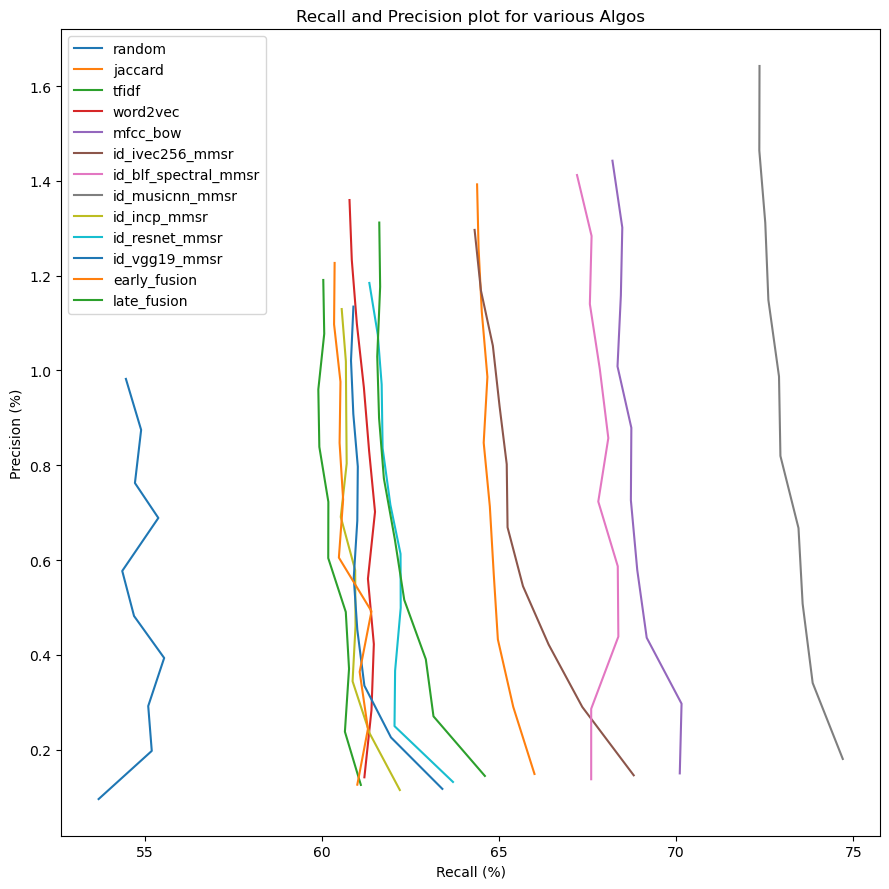

In [15]:
all_methods = similar_songs['method'].unique()
ks = range(10, 101, 10)

plt.figure(figsize=(9, 9))

for i, method in enumerate(all_methods):
    method_prec = [results[k][method]['recall']*100 for k in ks]
    method_rec = [results[k][method]['precision']*100 for k in ks]

    plt.plot(method_rec, method_prec)

plt.xlabel('Recall (%)')
plt.ylabel('Precision (%)')
plt.title('Recall and Precision plot for various Algos')
plt.legend(all_methods)

plt.tight_layout()
plt.show()

In [16]:
# def find_all_similar_songs1(song_id, info_data, word2vec_data, tfidf_data, top_n=10):
#     #Cosine similarity with MFCC Bow 
#     mfcc_bow_songs = retrieve_similar_songs(song_id, data_mfcc_bow, cosine_similarity_between_songs, info_data, top_n).assign(method='mfcc_bow')
    
#     return mfcc_bow_songs

In [17]:
# find_all_similar_songs1('01Yfj2T3YTwJ1Yfy', info=info_data, data_mfcc_bow)

In [18]:
# retrieve_similar_songs('GDGURAgKxNPEuXzM', data_mfcc_bow, cosine_similarity_between_songs, info_data, top_n=5 )

In [19]:
# print(data_mfcc_bow.'01Yfj2T3YTwJ1Yfy')

### Defining the display and interactive functions 

In [20]:
def display_similar_songs(all_similar_songs_df, song_name, artist_name):
    for method, group_df in all_similar_songs_df.groupby('method'):
        print(f"\nSongs similar to '{song_name}' by '{artist_name}' using {method.upper()} method are:")
        ipy_display(group_df.drop(columns=['method', 'similarity_score'], errors='ignore'))

        
def get_song_id_by_name_artist(song_name, artist_name, info_data):
    matched_songs = info_data[
        (info_data['song'].str.lower().str.strip() == song_name.lower().strip()) &
        (info_data['artist'].str.lower().str.strip() == artist_name.lower().strip())
    ]
    if not matched_songs.empty:
        return matched_songs.iloc[0]['id']
    else:
        return None
        
        
def interactive_song_retrieval(song_name, artist_name, method, top_n):
    song_id = get_song_id_by_name_artist(song_name, artist_name, info_data)
    if song_id is not None:
        if method == 'All':
            all_similar_songs_df = find_all_similar_songs(song_id, 
                                                          info_data, 
                                                          word2vec_data, 
                                                          tfidf_data, 
                                                          data_mfcc_bow,  
                                                          id_ivec256_mmsr, 
                                                          id_blf_spectral_mmsr, 
                                                          id_musicnn_mmsr,
                                                          id_incp_mmsr,
                                                          id_resnet_mmsr,
                                                          id_vgg19_mmsr,
                                                          top_n)
            display_similar_songs(all_similar_songs_df, song_name, artist_name)
        else:
            # Call the individual method directly
            if method == 'Random':
                display_songs = info_data.sample(top_n)
            elif method == 'Jaccard':
                display_songs = retrieve_similar_songs(song_id, tfidf_data, jaccard_similarity, info_data, top_n)
            elif method == 'TF-IDF':
                display_songs = retrieve_similar_songs(song_id, tfidf_data, cosine_similarity_between_songs, info_data, top_n)
            elif method == 'Word2Vec':
                display_songs = retrieve_similar_songs(song_id, word2vec_data, cosine_similarity_between_songs, info_data, top_n)
            elif method == 'data_mfcc_bow':
                display_songs = retrieve_similar_songs(song_id, data_mfcc_bow, cosine_similarity_between_songs, info_data, top_n)
            elif method == 'id_ivec256_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_ivec256_mmsr, cosine_similarity_between_songs, info_data, top_n)
            elif method == 'id_blf_spectral_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_blf_spectral_mmsr, cosine_similarity_between_songs, info_data, top_n)
            elif method == 'id_musicnn_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_musicnn_mmsr, cosine_similarity_between_songs, info_data, top_n)
            ### Video based
            elif method == 'id_incp_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_incp_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_incp_mmsr')
            elif method == 'id_resnet_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_resnet_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_resnet_mmsr')
            elif method == 'id_vgg19_mmsr':
                display_songs = retrieve_similar_songs(song_id, id_vgg19_mmsr, cosine_similarity_between_songs, info_data, top_n).assign(method='id_vgg19_mmsr')
                
                
        
            # Display the DataFrame without the similarity score and method columns
            display_songs = display_songs.drop(columns=['similarity_score'], errors='ignore')
            print(f"\nSongs similar to '{song_name}' by {artist_name} using {method.upper()} method are:")
            ipy_display(display_songs)
    else:
        print("Song not found. Please check the song name and artist.")

# Assuming the interactive widget has been set up as previously described
# Create widgets
song_name_widget = widgets.Text(
    value='',  # No default value
    placeholder='Enter song title',  # Placeholder text
    description='Song:',  # Label for the input box
    disabled=False
)

artist_name_widget = widgets.Text(
    value='',  # No default value
    placeholder='Enter artist name',  # Placeholder text
    description='Artist:',  # Label for the input box
    disabled=False
)

method_widget = widgets.Dropdown(options=['All', 
                                          'Random', 
                                          'Jaccard', 
                                          'TF-IDF', 
                                          'Word2Vec',
                                          'data_mfcc_bow',
                                          'id_ivec256_mmsr', 
                                          'id_blf_spectral_mmsr', 
                                          'id_musicnn_mmsr',
                                          'id_incp_mmsr',
                                          'id_resnet_mmsr',
                                          'id_vgg19_mmsr'], 
                                value='All', 
                                description='Method:', 
                                disabled=False)

# Slider for number of tracks
n_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='N-Tracks:', continuous_update=False)

# Widget to trigger the interactive retrieval
interactive_widget = widgets.interactive(
    interactive_song_retrieval,
    song_name=song_name_widget,
    artist_name=artist_name_widget,
    method=method_widget,
    top_n=n_slider  # Check this linkage
)


# Display the widget
ipy_display(interactive_widget)

interactive(children=(Text(value='', description='Song:', placeholder='Enter song title'), Text(value='', desc…

In [21]:
info_data

,id,artist,song,album_name
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition)
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002)
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te
...,...,...,...,...
10090,zyzILCQvVeUFIINi,Crowded House,When You Come,Temple Of Low Men
10091,zzgS4ZqyswamEWNj,Britney Spears,My Only Wish (This Year),Platinum Christmas
10092,zzoFYDMlqU1X2zz1,Thundercat,DUI,Drunk
10093,zzpkRCGA5ud8q4mv,Otis Redding,Rock Me Baby,Otis Blue


### Query and Retrieval Systems

In [22]:
# Initialize widgets for song and artist input
song_artist_widgets = []
for i in range(1, 4):  # Assuming 3 songs for analysis
    song_widget = widgets.Text(placeholder='Enter song title', description=f'Song {i}:')
    artist_widget = widgets.Text(placeholder='Enter artist name', description=f'Artist {i}:')
    song_artist_widgets.append((song_widget, artist_widget))

# Initialize other widgets
method_widget = widgets.Dropdown(options=['All', 'Random', 'Jaccard', 'TF-IDF', 'Word2Vec'], value='All', description='Method:')
n_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='N-Tracks:', continuous_update=False)
retrieve_button = widgets.Button(description='Get the damn Song', tooltip='Click to retrieve similar songs')
output_area = widgets.Output()

# Function to handle the retrieval
def on_retrieve_button_clicked(b):
    with output_area:
        clear_output()
        for song_widget, artist_widget in song_artist_widgets:
            song_name, artist_name = song_widget.value.strip(), artist_widget.value.strip()
            method, top_n = method_widget.value, n_slider.value
            if song_name and artist_name:
                if method == 'All':
                    methods = ['Random', 'Jaccard', 'TF-IDF', 'Word2Vec']
                    for m in methods:
                        interactive_song_retrieval(song_name, artist_name, m, top_n)
                else:
                    interactive_song_retrieval(song_name, artist_name, method, top_n)
            else:
                print(f"Enter both song title and artist name for {song_widget.description} and {artist_widget.description}")

# Link button click to handler
retrieve_button.on_click(on_retrieve_button_clicked)

# Display all widgets
display_layout = widgets.VBox([
    widgets.HBox([song_widget, artist_widget]) for song_widget, artist_widget in song_artist_widgets
] + [method_widget, n_slider, retrieve_button, output_area])

ipy_display(display_layout)